<a href="https://colab.research.google.com/github/varadasantosh/deep-learning-notes/blob/tensorflow/Importance_of_Scaling_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Required Libraries

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create Data to represent Non-Linear Relationship between Feature(**X**) and Labels(**y**)

In [6]:

X=tf.random.uniform(shape=(500,),minval=0,maxval=10,dtype=tf.float32)
y= X**4 + 2*(X**3)+0.5*(X**2)+6

X= X.numpy()
y= y.numpy()

# Perform Train , Test Split

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [8]:
st_scaler= StandardScaler()
X_train = st_scaler.fit_transform(X_train.reshape(-1,1))
X_test = st_scaler.transform(X_test.reshape(-1,1))

# st_scaler_1= StandardScaler()
# y_train = st_scaler_1.fit_transform(y_train.reshape(-1,1))
# y_test = st_scaler_1.transform(y_test.reshape(-1,1))

# Visually we can observe and confirm that the relationship between X & y is Non-Linear

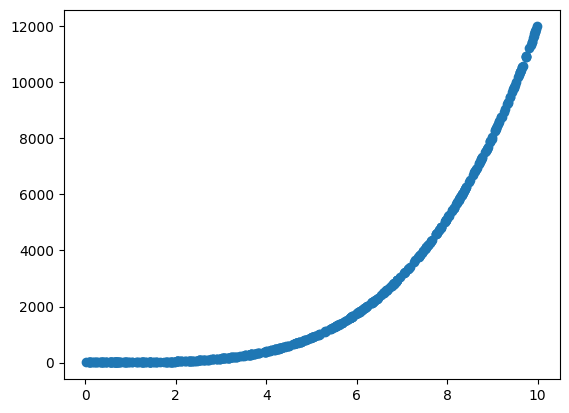

In [9]:
plt.scatter(X,y)

# Create the sickit-learn Linear Regression Model to find how it performs

In [10]:
sklearn_lr = LinearRegression()
sklearn_lr.fit(X_train.reshape(-1,1),y_train)
y_test_pred_sklearn = sklearn_lr.predict(X_test.reshape(-1,1))
sklearn_lr.score(X_test.reshape(-1,1),y_test)

0.7784910202026367

# From the plot We can observe that our sickit-learn model is not able to detect the relation ship between X,y appropriately

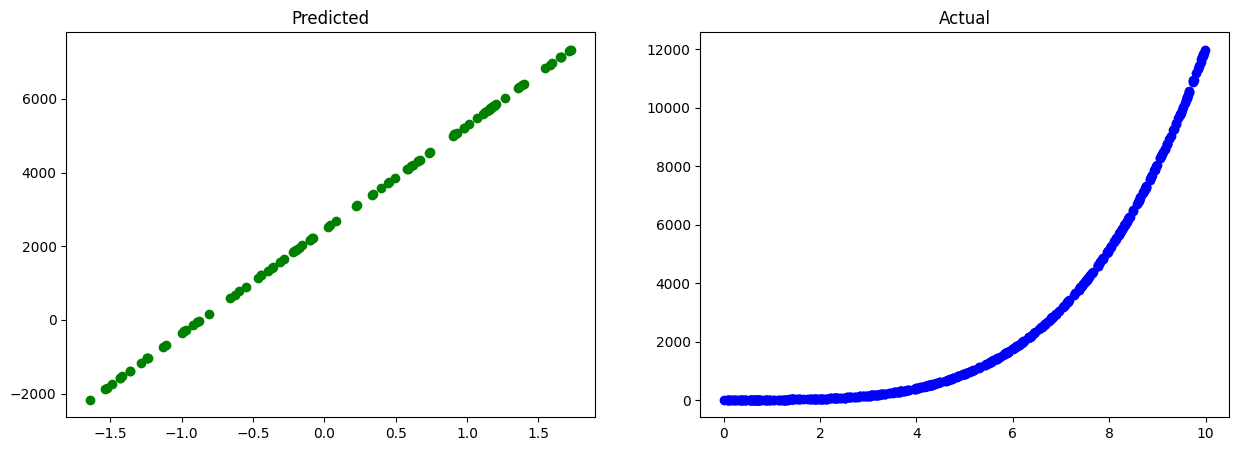

In [11]:
fig,axis = plt.subplots(1,2,figsize=(15,5))
axis[0].scatter(X_test,y_test_pred_sklearn,color='green')
axis[0].set_title('Predicted')
axis[1].scatter(X,y,color='blue')
axis[1].set_title('Actual')
plt.show()

# Let us try to use Neural Network Layer with below Architecture to see if it can detect the relationship between X,y

 1.Hidden Layer-1 - 30 Nodes, with Relu as Activation Function

 2.Hidden Layer-2  - 10 Nodes, with Relu as Activataion function

 3.Output Layer with One Node to get the predicted values (Regression)

In [26]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import SGD
from tensorflow import keras

tf_lr = Sequential(
    [
        Input(shape=(1,)),
        Dense(30,activation='relu'),
        Dense(10,activation='relu'),
        Dense(1)
    ],
    name ='torch_linearregression'
)

In [23]:
tf_lr.summary()

Model: "torch_linearregression"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 30)                  │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │             310 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 381 (1.49 KB)

 Trainable params: 381 (1.49 KB)

 Non-trainable params: 0 (0.00 B)

# We are using `**SGD**` as Optimizer to reduce the Loss calcualted by Loss function `**MeanSquaredError**`









In [27]:
X_train_tf =tf.convert_to_tensor(X_train)
X_test_tf = tf.convert_to_tensor(X_test)
y_train_tf = tf.convert_to_tensor(y_train)
y_test_tf = tf.convert_to_tensor(y_test)

optimizer = SGD(learning_rate=0.001)
loss_fn = keras.losses.MeanSquaredError
tf_lr.compile(optimizer=optimizer,loss=loss_fn)

# We Can observe that though we are using Non-Linear Activation function with two layers and `Learning Rate` of 0.001 resulting in huge Loss

In [28]:
tf_lr.fit(X_train_tf,y_train_tf,epochs=100)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1531172618240.0000
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16666050.0000  
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19218614.0000 
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17449092.0000 
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19076252.0000 
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16239560.0000  
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16129185.0000 
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15720079.0000 
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17959350.0000 
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14473961.0000 
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15039576.0000 
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16038554.0000 
Epoch 13/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16052949.0000 
Epoch 14/100
13/13 ━━━━━━━━━

In [29]:
train_loss = tf_lr.evaluate(X_train_tf,y_train_tf)
print(f'Train Loss:-{train_loss}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11905690.0000  
Train Loss:-10475986.0


In [30]:
test_loss = tf_lr.evaluate(X_test_tf,y_test_tf)
print(f'Test Loss:-{test_loss}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11447305.0000 
Test Loss:-12284654.0


In [32]:
y_test_pred_tf= tf_lr.predict(X_test_tf)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


# From the plot between Features(X_test) and Labels(y_test) we can see that models is not able to fit the line to our test data appropriately

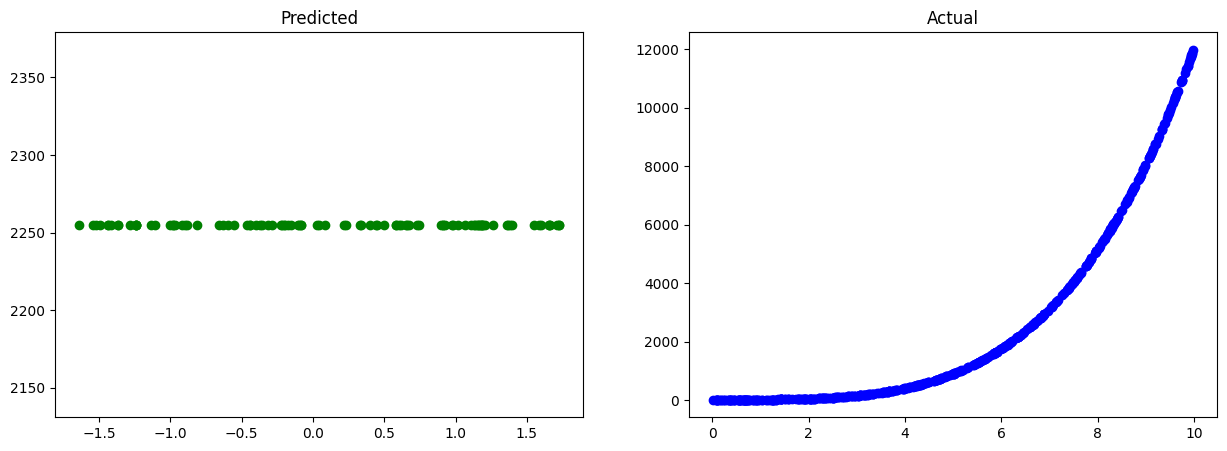

In [33]:
fig,axis = plt.subplots(1,2,figsize=(15,5))
axis[0].scatter(X_test_tf,y_test_pred_tf,color='green')
axis[0].set_title('Predicted')
axis[1].scatter(X,y,color='blue')
axis[1].set_title('Actual')
plt.show()

# Let us try to perform scaling on the Input data to see the impact of it on the training and convergence of model

In [34]:
feature_scaler = StandardScaler()
label_scaler = StandardScaler()
X_train_scaled = feature_scaler.fit_transform(X_train.reshape(-1,1))
X_test_scaled = feature_scaler.transform(X_test.reshape(-1,1))
y_train_scaled = label_scaler.fit_transform(y_train.reshape(-1,1))
y_test_scaled = label_scaler.transform(y_test.reshape(-1,1))
X_train_tf= tf.convert_to_tensor(X_train_scaled)
X_test_tf = tf.convert_to_tensor(X_test_scaled)
y_train_tf = tf.convert_to_tensor(y_train_scaled)
y_test_tf = tf.convert_to_tensor(y_test_scaled)

# Create the Neural Netwrok Architecture like described earlier, also we keep the Optimizer , Loss function and Learning Rate parameters as same as before i.e

 # 1.Optimizer- `SGD`
 # 2.Loss Functon - `MeanSquaredError`
 # 3.Learning Rate - `0.001`

In [37]:
tf_lr_2 = Sequential(
    [
        Input(shape=(1,)),
        Dense(30,activation='relu'),
        Dense(10,activation='relu'),
        Dense(1)
    ],
    name ='torch_linearregression'
)

optimizer = keras.optimizers.SGD(learning_rate=0.001)
loss_fn = keras.losses.MeanSquaredError
tf_lr_2.compile(optimizer=optimizer,loss=loss_fn)

# We can observe that the Loss of the Model is in the permissible limits and loss is moving towards convergence gradually

In [38]:
tf_lr_2.fit(X_train_tf,y_train_tf,epochs=100)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9103  
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8421 
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7484 
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6318 
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6182 
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6073 
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5584 
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5155 
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4762 
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4633  
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4544  
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4274  
Epoch 13/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4387 
Epoch 14/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3934 
Epoch 15/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

# We can see that Training Loss and Test Loss reduced by huge values

In [39]:
train_loss_tf_2 =tf_lr_2.evaluate(X_train_tf,y_train_tf)
print(f'Train Loss:-{train_loss_tf_2}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0477  
Train Loss:-0.039456676691770554


In [40]:
test_loss_tf_2 = tf_lr_2.evaluate(X_test_tf,y_test_tf)
print(f'Test Loss:-{test_loss_tf_2}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0474 
Test Loss:-0.052361901849508286


In [41]:
y_test_pred_tf_2 = tf_lr_2.predict(X_test_tf)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


# We can observe that the model is fitting appropriately on the test data

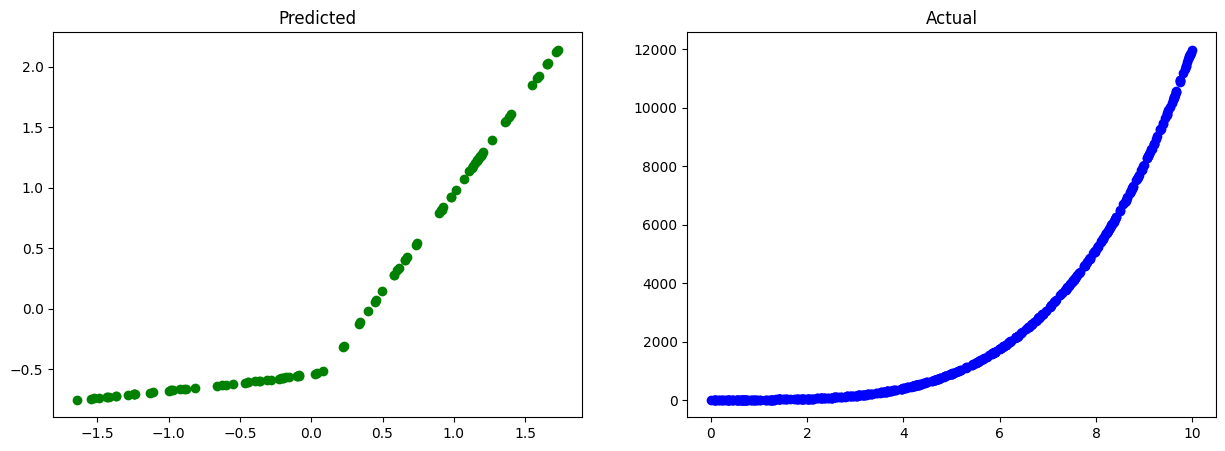

In [42]:
fig, axis = plt.subplots(1,2,figsize=(15,5))
axis[0].scatter(X_test_tf,y_test_pred_tf_2,color='green')
axis[0].set_title('Predicted')
axis[1].scatter(X,y,color='blue')
axis[1].set_title('Actual')
plt.show()
